# Linear Discriminant Analysis (LDA)
LDA reduces dimensions by separating the labeled (known) categories as far as possible.

### LDA vs PCA
<img src="images/lda/lda_vs_pca.png" height="75%" width="75%"></img>

#### Similarties
1. Both rank the new axes (LD1 and LD2) or (PC1 and PC2) in order of importance where LD1 or PC1 are the most important and LD2 or PC2 are the second most important.
2. Both methods allow you to see which independent variables correlate with the new axes (as graphed below).

#### Differences
1. Because the categories in LDA are known, LDA is a supervised model unlike PCA which is unsupervised.    
2. LDA focuses on maximizing separability of categories while PCA focuses on variation of categories.

### Linear Discriminants (LD) Meaning
Let's say hypothetically we perform LDA with LD1 = 60% and LD2 = 40% as the expected variance percentages.
- LD1 (the first largest variation) accounts for 60% of the variation (separation) between the categories
- LD2 (the first largest variation) accounts for 40% of the variation (separation) between the categories

Then we would have a 2D data set using LD1 and LD2 with 100% of the separation of categories from the large data set!

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set
wine_df = pd.read_csv("datasets/wine.csv")

wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# receive only the independent variables, disregard the dependent variable Customer_Segment
x = wine_df.iloc[:, 0:13].values

# receive the Customer_Support column
y = wine_df.iloc[:, 13].values

In [4]:
# import a Standarization Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler

# feature scale the (independent variables)
sc_X = StandardScaler()
scaled_x = sc_X.fit_transform(x)

# LDA Model

In [5]:
# import the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [6]:
# create an LDA with 2 linear discriminants
lda = LDA(n_components=2)

# fit and transform the scaled independent variables
x_reduced = lda.fit_transform(scaled_x, y)

"""
show the first 10 rows of the reduced data frame

Now there are only 2 independent variables (LD1 and LD2).
"""
x_reduced[:10]

array([[-4.70024401,  1.97913835],
       [-4.30195811,  1.17041286],
       [-3.42071952,  1.42910139],
       [-4.20575366,  4.00287148],
       [-1.50998168,  0.4512239 ],
       [-4.51868934,  3.21313756],
       [-4.52737794,  3.26912179],
       [-4.14834781,  3.10411765],
       [-3.86082876,  1.95338263],
       [-3.36662444,  1.67864327]])

In [7]:
"""
the explained variance (LDs) of each linear discriminants in descending order

LD1 equals 68.75% and LD2 equals 31.25% of the data set's scalings.
This means the LDA received 100% of the data set's categories scaling
from only 2 linear discriminants.
"""
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

# Graph LDA
Below is a graph of the original DataFrame's columns columns and their separability for each linear discriminant. Based on the graph of the LDA below, there seems to be sporadic clusters.

In [8]:
# create a DataFrame using each column's scalings per linear discriminant
reduced_wine_df = pd.DataFrame(
    lda.scalings_.T,
    columns=wine_df.iloc[:, 0:13].columns,
    index=["LD1", "LD2"]
)

reduced_wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
LD1,-0.326569,0.184094,-0.100969,0.515503,-0.030813,0.385720,-1.654628,-0.185636,0.076533,0.820805,-0.186454,-0.819544,-0.845097
LD2,0.705754,0.340194,0.641759,-0.487473,-0.006591,-0.020104,-0.490054,-0.202407,-0.175270,0.585410,-0.345456,0.036238,0.895899


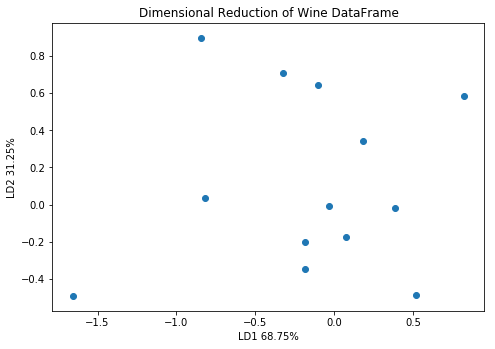

In [9]:
# create a blank plot figure
figure = plt.figure()

# add the graph's axes with their aspect ratios
axes = figure.add_axes([1, 1, 1, 1])

# set the LD1 and LD2 labels on the axes
rounded_ld1 = str(round(lda.explained_variance_ratio_[0] * 100, 2))
rounded_ld2 = str(round(lda.explained_variance_ratio_[1] * 100, 2))
axes.set_xlabel("LD1 " + rounded_ld1 + "%")
axes.set_ylabel("LD2 " + rounded_ld2 + "%")

# set the title
axes.set_title("Dimensional Reduction of Wine DataFrame")

# scatter plot the LD1 (x-axis) and LD2 (y-axis)
axes.scatter(x=reduced_wine_df.loc["LD1"], y=reduced_wine_df.loc["LD2"])